In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor, AdaBoostClassifier
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor, XGBClassifier
from lightgbm import LGBMRegressor, LGBMClassifier
from catboost import CatBoostRegressor, CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import preprocessing
import seaborn as sns

In [2]:
# 데이터 로딩
df_train = pd.read_csv('C:/Users/wnrrh/desktop/dacon/penguin/train.csv')
df_test = pd.read_csv('C:/Users/wnrrh/desktop/dacon/penguin/test.csv')
ss = pd.read_csv('C:/Users/wnrrh/desktop/dacon/penguin/sample_submission.csv')

In [3]:
# 불필요한 컬럼 제거
df_train.drop(['id'],axis=1, inplace=True)
df_test.drop(['id'],axis=1, inplace=True)

In [4]:
ob_cols = df_train.dtypes[df_train.dtypes == 'object'].index.tolist()
for i in ob_cols:
    print('i:', i)
    print(df_train[i].value_counts(),'\n')

i: Species
Gentoo penguin (Pygoscelis papua)            48
Adelie Penguin (Pygoscelis adeliae)          41
Chinstrap penguin (Pygoscelis antarctica)    25
Name: Species, dtype: int64 

i: Island
Biscoe       57
Dream        44
Torgersen    13
Name: Island, dtype: int64 

i: Clutch Completion
Yes    102
No      12
Name: Clutch Completion, dtype: int64 

i: Sex
MALE      56
FEMALE    55
Name: Sex, dtype: int64 



In [5]:
# 훈련 데이터 내 결측치 확인
def check_missing_col(dataframe):
    missing_col = []
    counted_missing_col = 0
    for i, col in enumerate(dataframe.columns):
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            counted_missing_col += 1
            print(f'결측치가 있는 컬럼은: {col}입니다')
            print(f'해당 컬럼에 총 {missing_values}개의 결측치가 존재합니다.')
            missing_col.append([col, dataframe[col].dtype])
    if counted_missing_col == 0:
        print('결측치가 존재하지 않습니다')
    return missing_col

missing_col = check_missing_col(df_train)

결측치가 있는 컬럼은: Sex입니다
해당 컬럼에 총 3개의 결측치가 존재합니다.
결측치가 있는 컬럼은: Delta 15 N (o/oo)입니다
해당 컬럼에 총 3개의 결측치가 존재합니다.
결측치가 있는 컬럼은: Delta 13 C (o/oo)입니다
해당 컬럼에 총 3개의 결측치가 존재합니다.


In [6]:
# 테스트 데이터 내 결측치 확인
missing_val = check_missing_col(df_test)

결측치가 있는 컬럼은: Sex입니다
해당 컬럼에 총 6개의 결측치가 존재합니다.
결측치가 있는 컬럼은: Delta 15 N (o/oo)입니다
해당 컬럼에 총 9개의 결측치가 존재합니다.
결측치가 있는 컬럼은: Delta 13 C (o/oo)입니다
해당 컬럼에 총 8개의 결측치가 존재합니다.


Sex,Clutch Completion 는 male은 1, female은 0, Yes 는 1, No 는 0으로 처리

Island와 Species는 원 핫 인코딩으로 처리

In [7]:
df_train['Sex']=np.where(df_train['Sex'].values=='MALE',1,np.where(df_train['Sex'].values=='FEMALE',0,np.nan))
df_test['Sex']=np.where(df_test['Sex'].values=='MALE',1,np.where(df_test['Sex'].values=='FEMALE',0,np.nan))
df_train['Clutch Completion']=np.where(df_train['Clutch Completion'].values=='Yes',1,0)
df_test['Clutch Completion']=np.where(df_test['Clutch Completion'].values=='Yes',1,0)
train = pd.concat([df_train,pd.get_dummies(df_train[['Island','Species']])],axis=1)
test = pd.concat([df_test,pd.get_dummies(df_test[['Island','Species']])],axis=1)
train = train.drop(['Island','Species'],axis=1)
test = test.drop(['Island','Species'],axis=1)

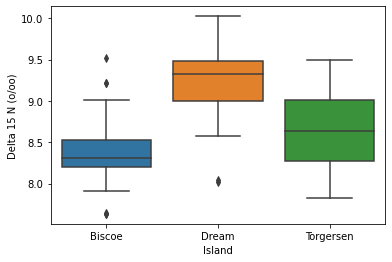

In [8]:
sns.boxplot(x='Island', y='Delta 15 N (o/oo)', data=df_train[['Island','Delta 15 N (o/oo)']])
plt.show()

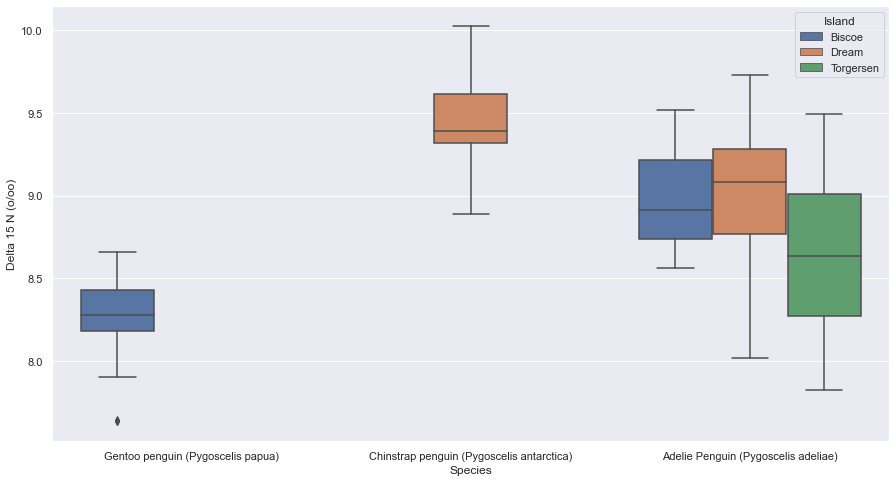

In [9]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.boxplot(x='Species', y='Delta 15 N (o/oo)',hue = 'Island', data=df_train[['Island','Species','Delta 15 N (o/oo)']])
plt.show()

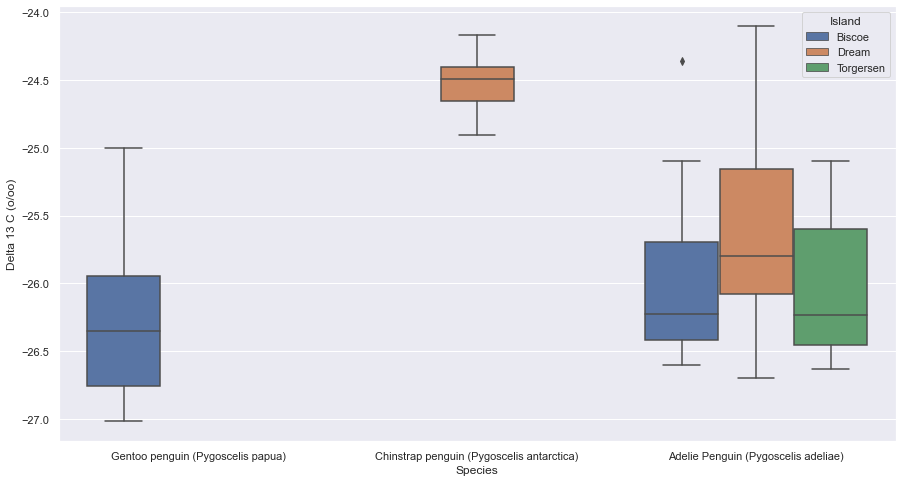

In [10]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.boxplot(x='Species', y='Delta 13 C (o/oo)',hue = 'Island', data=df_train[['Island','Species','Delta 13 C (o/oo)']])
plt.show()

In [11]:
set_option('precision',2)
train.corr(method='pearson')

,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g),Island_Biscoe,Island_Dream,Island_Torgersen,Species_Adelie Penguin (Pygoscelis adeliae),Species_Chinstrap penguin (Pygoscelis antarctica),Species_Gentoo penguin (Pygoscelis papua)
Clutch Completion,1.00,-0.12,-0.21,0.11,-1.13e-01,-0.28,-0.29,0.09,2.29e-01,-3.15e-01,0.12,0.08,-0.30,0.18
Culmen Length (mm),-0.12,1.00,-0.25,0.67,3.24e-01,-0.04,0.11,0.57,2.97e-01,-4.72e-02,-0.39,-0.82,0.38,0.48
Culmen Depth (mm),-0.21,-0.25,1.00,-0.60,3.69e-01,0.65,0.48,-0.49,-7.25e-01,5.60e-01,0.28,0.52,0.38,-0.83
Flipper Length (mm),0.11,0.67,-0.60,1.00,2.51e-01,-0.53,-0.45,0.86,7.40e-01,-5.66e-01,-0.30,-0.69,-0.25,0.88
Sex,-0.11,0.32,0.37,0.25,1.00e+00,0.14,-0.10,0.42,-9.09e-03,-7.30e-03,0.03,0.05,-0.07,0.01
Delta 15 N (o/oo),-0.28,-0.04,0.65,-0.53,1.36e-01,1.00,0.64,-0.55,-6.44e-01,7.03e-01,-0.07,0.17,0.65,-0.71
Delta 13 C (o/oo),-0.29,0.11,0.48,-0.45,-9.94e-02,0.64,1.00,-0.47,-5.89e-01,6.74e-01,-0.11,-0.09,0.76,-0.56
Body Mass (g),0.09,0.57,-0.49,0.86,4.20e-01,-0.55,-0.47,1.00,7.08e-01,-5.74e-01,-0.24,-0.51,-0.39,0.82
Island_Biscoe,0.23,0.30,-0.72,0.74,-9.09e-03,-0.64,-0.59,0.71,1.00e+00,-7.93e-01,-0.36,-0.42,-0.53,0.85
Island_Dream,-0.32,-0.05,0.56,-0.57,-7.30e-03,0.70,0.67,-0.57,-7.93e-01,1.00e+00,-0.28,0.12,0.67,-0.68


Sex 결측치 채우기

In [12]:
sex_features = ['Culmen Length (mm)', 'Culmen Depth (mm)',
       'Flipper Length (mm)','Species_Adelie Penguin (Pygoscelis adeliae)',
       'Species_Chinstrap penguin (Pygoscelis antarctica)',
       'Species_Gentoo penguin (Pygoscelis papua)', 'Island_Biscoe', 'Island_Dream', 'Island_Torgersen'
       ]

In [13]:
models = []
models.append(('LR',LogisticRegression(solver='liblinear',multi_class = 'ovr')))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC(gamma='auto')))
models.append(('RFC',RandomForestClassifier()))
models.append(('XGBC',XGBClassifier(iterations=10000,verbose=False,verbosity=0)))
models.append(('LGBMC',LGBMClassifier()))
models.append(('AdaC',AdaBoostClassifier()))
models.append(('Cat',CatBoostClassifier(iterations=10000,verbose=False)))
results =[]
names = []
for name, model in models:
  kfold = KFold(n_splits=10,random_state=7,shuffle = True)
  cv_results = cross_val_score(model,train[sex_features].iloc[train['Sex'].dropna().index]
                               ,train['Sex'].iloc[train['Sex'].dropna().index]
                               ,cv= kfold,scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  msg = "%s : %f (%f) "%(name,cv_results.mean(),cv_results.std())
  print(msg)

LR : 0.721212 (0.083320) 
LDA : 0.874242 (0.091926) 
KNN : 0.775000 (0.092291) 
CART : 0.774242 (0.117451) 
NB : 0.702273 (0.147447) 
SVM : 0.737879 (0.138543) 
RFC : 0.810606 (0.086044) 


C:\Users\wnrrh\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\wnrrh\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\wnrrh\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of 

XGBC : 0.801515 (0.113879) 
LGBMC : 0.837879 (0.120462) 
AdaC : 0.891667 (0.068270) 
Cat : 0.810606 (0.086044) 


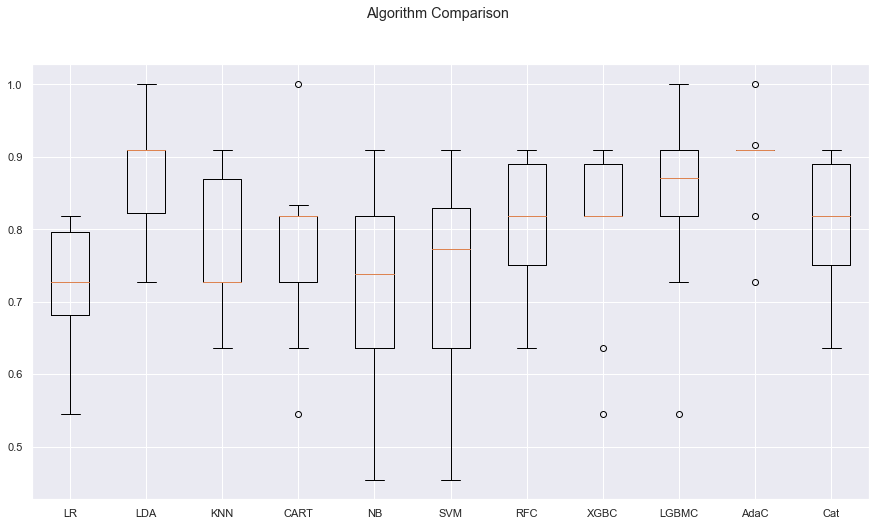

In [14]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [15]:
sex_model = AdaBoostClassifier()
sex_model.fit(train[sex_features].iloc[train['Sex'].dropna().index],train['Sex'].iloc[train['Sex'].dropna().index])
train['Sex'].iloc[np.where(train['Sex'].isnull()==True)] =  sex_model.predict(train[train['Sex'].isnull()][sex_features])
test['Sex'].iloc[np.where(test['Sex'].isnull()==True)] =  sex_model.predict(test[test['Sex'].isnull()][sex_features])

C:\Users\wnrrh\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\wnrrh\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Delta 15 N 결측치 채우기

In [16]:
Delta_features = ['Culmen Length (mm)', 'Culmen Depth (mm)',
       'Flipper Length (mm)','Species_Adelie Penguin (Pygoscelis adeliae)',
       'Species_Chinstrap penguin (Pygoscelis antarctica)',
       'Species_Gentoo penguin (Pygoscelis papua)', 'Island_Biscoe', 'Island_Dream', 'Island_Torgersen','Sex'
       ]

In [17]:
models = []
models.append(('LR',LinearRegression()))
models.append(('LASSO',Lasso()))
models.append(('KNN',KNeighborsRegressor()))
models.append(('CART',DecisionTreeRegressor()))
models.append(('EN',ElasticNet()))
models.append(('SVM',SVR()))
models.append(('RFR',RandomForestRegressor()))
models.append(('XGBR',XGBRegressor(iterations=10000,verbose=False)))
models.append(('LGBMR',LGBMRegressor()))
models.append(('AdaR',AdaBoostRegressor()))
models.append(('Cat',CatBoostRegressor(iterations=10000,verbose=False)))
results =[]
names = []
for name, model in models:
  kfold = KFold(n_splits=10,random_state=7,shuffle = True)
  cv_results = cross_val_score(model,train[Delta_features].iloc[train['Delta 15 N (o/oo)'].dropna().index]
                               ,train['Delta 15 N (o/oo)'].iloc[train['Delta 15 N (o/oo)'].dropna().index]
                               ,cv= kfold,scoring='neg_mean_squared_error')
  results.append(cv_results)
  names.append(name)
  msg = "%s : %f (%f) "%(name,cv_results.mean(),cv_results.std())
  print(msg)

LR : -0.116568 (0.036340) 
LASSO : -0.238135 (0.090412) 
KNN : -0.159055 (0.078713) 
CART : -0.237853 (0.117637) 
EN : -0.211953 (0.079840) 
SVM : -0.232461 (0.090579) 
RFR : -0.145737 (0.069871) 
XGBR : -0.167617 (0.092666) 
LGBMR : -0.126749 (0.041506) 
AdaR : -0.141209 (0.070210) 
Cat : -0.154403 (0.073445) 


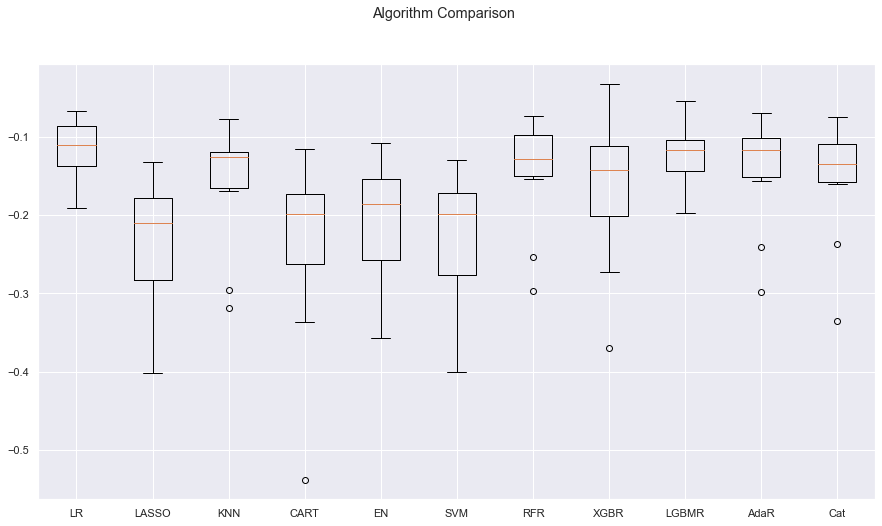

In [18]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [19]:
d15_model = AdaBoostRegressor()
d15_model.fit(train[Delta_features].iloc[train['Delta 15 N (o/oo)'].dropna().index]
                               ,train['Delta 15 N (o/oo)'].iloc[train['Delta 15 N (o/oo)'].dropna().index])
train['Delta 15 N (o/oo)'].iloc[np.where(train['Delta 15 N (o/oo)'].isnull()==True)] =  d15_model.predict(train[train['Delta 15 N (o/oo)'].isnull()][Delta_features])
test['Delta 15 N (o/oo)'].iloc[np.where(test['Delta 15 N (o/oo)'].isnull()==True)] =  d15_model.predict(test[test['Delta 15 N (o/oo)'].isnull()][Delta_features])

C:\Users\wnrrh\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\wnrrh\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Delta 13 N 결측치 채우기

In [20]:
models = []
models.append(('LR',LinearRegression()))
models.append(('LASSO',Lasso()))
models.append(('KNN',KNeighborsRegressor()))
models.append(('CART',DecisionTreeRegressor()))
models.append(('EN',ElasticNet()))
models.append(('SVM',SVR()))
models.append(('RFR',RandomForestRegressor()))
models.append(('XGBR',XGBRegressor(iterations=10000,verbose=False)))
models.append(('LGBMR',LGBMRegressor()))
models.append(('AdaR',AdaBoostRegressor()))
models.append(('Cat',CatBoostRegressor(iterations=10000,verbose=False)))
results =[]
names = []
for name, model in models:
  kfold = KFold(n_splits=10,random_state=7,shuffle = True)
  cv_results = cross_val_score(model,train[Delta_features].iloc[train['Delta 13 C (o/oo)'].dropna().index]
                               ,train['Delta 13 C (o/oo)'].iloc[train['Delta 13 C (o/oo)'].dropna().index]
                               ,cv= kfold,scoring='neg_mean_squared_error')
  results.append(cv_results)
  names.append(name)
  msg = "%s : %f (%f) "%(name,cv_results.mean(),cv_results.std())
  print(msg)

LR : -0.282013 (0.152863) 
LASSO : -0.478706 (0.192187) 
KNN : -0.415174 (0.254843) 
CART : -0.507946 (0.251325) 
EN : -0.396727 (0.177711) 
SVM : -0.634220 (0.269142) 
RFR : -0.347481 (0.157037) 
XGBR : -0.422721 (0.218251) 
LGBMR : -0.306097 (0.129707) 
AdaR : -0.333771 (0.153032) 
Cat : -0.397602 (0.173610) 


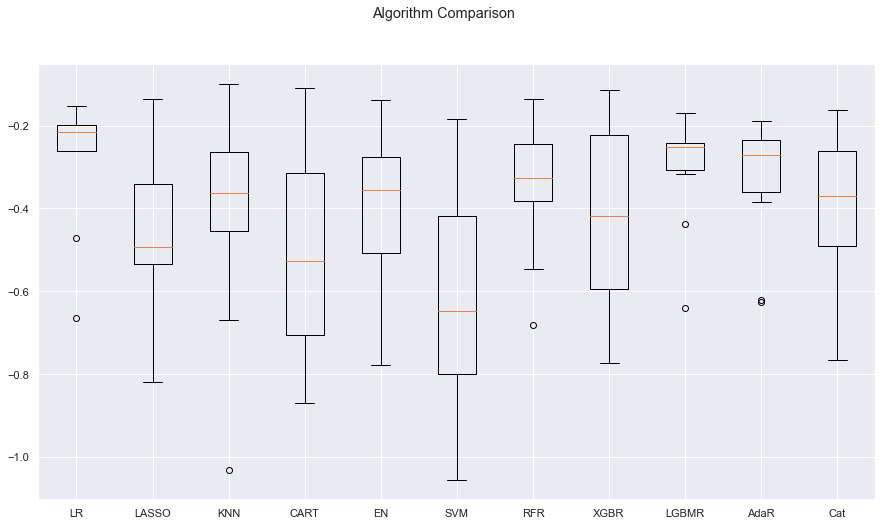

In [21]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [22]:
d13_model = LinearRegression()
d13_model.fit(train[Delta_features].iloc[train['Delta 13 C (o/oo)'].dropna().index]
                               ,train['Delta 13 C (o/oo)'].iloc[train['Delta 13 C (o/oo)'].dropna().index])
train['Delta 13 C (o/oo)'].iloc[np.where(train['Delta 13 C (o/oo)'].isnull()==True)] =  d13_model.predict(train[train['Delta 13 C (o/oo)'].isnull()][Delta_features])
test['Delta 13 C (o/oo)'].iloc[np.where(test['Delta 13 C (o/oo)'].isnull()==True)] =  d13_model.predict(test[test['Delta 13 C (o/oo)'].isnull()][Delta_features])

C:\Users\wnrrh\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\wnrrh\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [23]:
# 결측치 잘 채워졌나 확인
for col in test.columns:
    n_nan = test[col].isnull().sum()
    if n_nan>0:
      msg = '{:^20}에서 결측치 개수 : {}개'.format(col,n_nan)
      print(msg)

# Modeling

In [24]:
num_folds= 10
seed = 7
scoring = 'neg_root_mean_squared_error'

X_all = train[test.columns.tolist()]
y_all =train['Body Mass (g)']

In [25]:
X_train, X_valid, y_train, y_valid = train_test_split(train[test.columns.tolist()],train['Body Mass (g)']
                                                      ,test_size=0.2,random_state=seed)

In [26]:
models = []
models.append(('LR',LinearRegression()))
models.append(('LASSO',Lasso()))
models.append(('KNN',KNeighborsRegressor()))
models.append(('CART',DecisionTreeRegressor()))
models.append(('EN',ElasticNet()))
models.append(('SVM',SVR()))
models.append(('RFR',RandomForestRegressor()))
models.append(('XGBR',XGBRegressor()))
models.append(('LGBMR',LGBMRegressor()))
models.append(('AdaR',AdaBoostRegressor()))
models.append(('Cat',CatBoostRegressor(verbose=False)))
models.append(('Xtree',ExtraTreesRegressor()))

results =[]
names = []
for name, model in models:
  kfold = KFold(n_splits=10,random_state=7,shuffle = True)
  cv_results = cross_val_score(model,X_train,y_train
                               ,cv= kfold,scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s : %f (%f) "%(name,cv_results.mean(),cv_results.std())
  print(msg)

LR : -330.719540 (56.761748) 
LASSO : -329.263596 (55.593551) 
KNN : -388.766440 (54.708975) 
CART : -408.393391 (91.705927) 
EN : -376.245575 (57.954416) 
SVM : -775.629941 (193.158683) 
RFR : -333.816990 (80.266155) 
XGBR : -360.081094 (57.213668) 
LGBMR : -343.267893 (56.144646) 
AdaR : -354.709648 (61.129986) 
Cat : -320.380714 (74.349676) 
Xtree : -321.391019 (71.303179) 


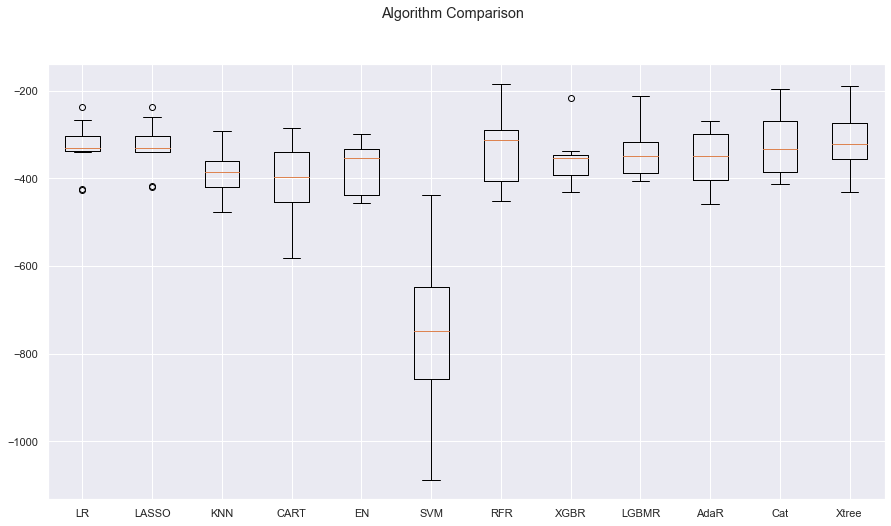

In [27]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [28]:
pipelines = []
pipelines.append(('ScaledLR',Pipeline([('Scaler',preprocessing.StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO',Pipeline([('Scaler',preprocessing.StandardScaler()),('LASSO',Lasso())])))
pipelines.append(('ScaledKNN',Pipeline([('Scaler',preprocessing.StandardScaler()),('KNN',KNeighborsRegressor())])))
pipelines.append(('ScaledCART',Pipeline([('Scaler',preprocessing.StandardScaler()),('CART',DecisionTreeRegressor())])))
pipelines.append(('ScaledEN',Pipeline([('Scaler',preprocessing.StandardScaler()),('EN',ElasticNet())])))
pipelines.append(('ScaledSVM',Pipeline([('Scaler',preprocessing.StandardScaler()),('SVM',SVR())])))
pipelines.append(('ScaledRFR',Pipeline([('Scaler',preprocessing.StandardScaler()),('RFR',RandomForestRegressor())])))
pipelines.append(('ScaledXGBR',Pipeline([('Scaler',preprocessing.StandardScaler()),('XGBR',XGBRegressor())])))
pipelines.append(('ScaledLGBMR',Pipeline([('Scaler',preprocessing.StandardScaler()),('LGBMR',LGBMRegressor())])))
pipelines.append(('ScaledAdaR',Pipeline([('Scaler',preprocessing.StandardScaler()),('AdaR',AdaBoostRegressor())])))
pipelines.append(('ScaledCat',Pipeline([('Scaler',preprocessing.StandardScaler()),('Cat',CatBoostRegressor(verbose=False))])))
pipelines.append(('ScaledXtree',Pipeline([('Scaler',preprocessing.StandardScaler()),('Xtree',ExtraTreesRegressor())])))

results_scaled =[]
names_scaled = []
for name, model in pipelines:
  kfold = KFold(n_splits=10,random_state=7,shuffle = True)
  cv_results = cross_val_score(model,X_train,y_train
                               ,cv= kfold,scoring=scoring)
  results_scaled.append(cv_results)
  names_scaled.append(name)
  msg = "%s : %f (%f) "%(name,cv_results.mean(),cv_results.std())
  print(msg)

ScaledLR : -330.719540 (56.761748) 
ScaledLASSO : -330.414507 (55.565246) 
ScaledKNN : -344.411139 (69.674407) 
ScaledCART : -425.415617 (90.787590) 
ScaledEN : -343.899576 (61.431753) 
ScaledSVM : -767.475813 (192.286894) 
ScaledRFR : -341.912480 (85.431297) 
ScaledXGBR : -360.076954 (57.214286) 
ScaledLGBMR : -343.119043 (61.419924) 
ScaledAdaR : -347.590856 (55.015684) 
ScaledCat : -322.030441 (72.175881) 
ScaledXtree : -323.921719 (70.848669) 


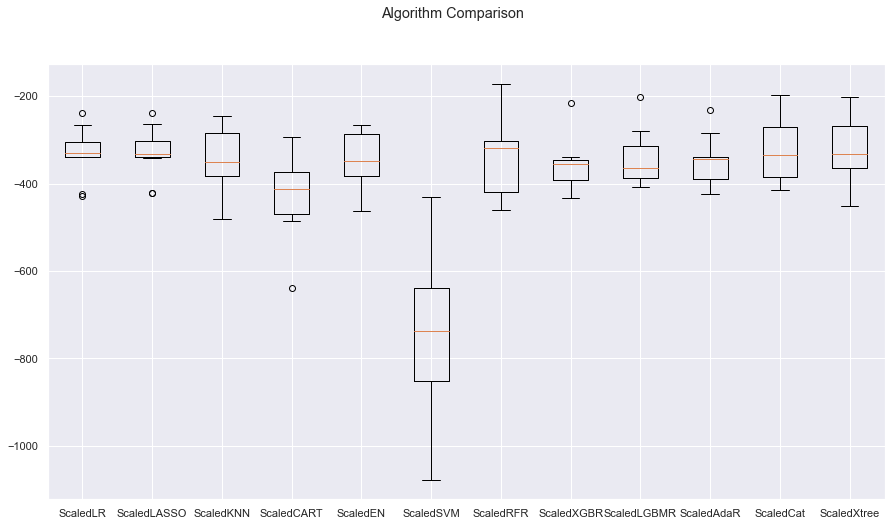

In [29]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results_scaled)
ax.set_xticklabels(names_scaled)
plt.show()

In [30]:
pipelines = []
pipelines.append(('NormLR',Pipeline([('Scaler',preprocessing.Normalizer()),('LR',LinearRegression())])))
pipelines.append(('NormLASSO',Pipeline([('Scaler',preprocessing.Normalizer()),('LASSO',Lasso())])))
pipelines.append(('NormKNN',Pipeline([('Scaler',preprocessing.Normalizer()),('KNN',KNeighborsRegressor())])))
pipelines.append(('NormCART',Pipeline([('Scaler',preprocessing.Normalizer()),('CART',DecisionTreeRegressor())])))
pipelines.append(('NormEN',Pipeline([('Scaler',preprocessing.Normalizer()),('EN',ElasticNet())])))
pipelines.append(('NormSVM',Pipeline([('Scaler',preprocessing.Normalizer()),('SVM',SVR())])))
pipelines.append(('NormRFR',Pipeline([('Scaler',preprocessing.Normalizer()),('RFR',RandomForestRegressor())])))
pipelines.append(('NormXGBR',Pipeline([('Scaler',preprocessing.Normalizer()),('XGBR',XGBRegressor())])))
pipelines.append(('NormLGBMR',Pipeline([('Scaler',preprocessing.Normalizer()),('LGBMR',LGBMRegressor())])))
pipelines.append(('NormAdaR',Pipeline([('Scaler',preprocessing.Normalizer()),('AdaR',AdaBoostRegressor())])))
pipelines.append(('NormCat',Pipeline([('Scaler',preprocessing.Normalizer()),('Cat',CatBoostRegressor(verbose=False))])))
pipelines.append(('NormXtree',Pipeline([('Scaler',preprocessing.Normalizer()),('Xtree',ExtraTreesRegressor())])))

results_norm =[]
names_norm = []
for name, model in pipelines:
  kfold = KFold(n_splits=10,random_state=7,shuffle = True)
  cv_results = cross_val_score(model,X_train,y_train
                               ,cv= kfold,scoring=scoring)
  results_norm.append(cv_results)
  names_norm.append(name)
  msg = "%s : %f (%f) "%(name,cv_results.mean(),cv_results.std())
  print(msg)

NormLR : -336.123078 (52.901704) 
NormLASSO : -535.770671 (76.311161) 
NormKNN : -384.641645 (42.751212) 
NormCART : -402.876817 (95.473926) 
NormEN : -771.844126 (171.084753) 
NormSVM : -776.125076 (193.274446) 
NormRFR : -338.373032 (91.988125) 
NormXGBR : -328.180785 (52.189713) 
NormLGBMR : -338.713049 (82.575553) 
NormAdaR : -354.787005 (95.628930) 
NormCat : -347.613480 (67.538529) 
NormXtree : -347.678976 (59.956367) 


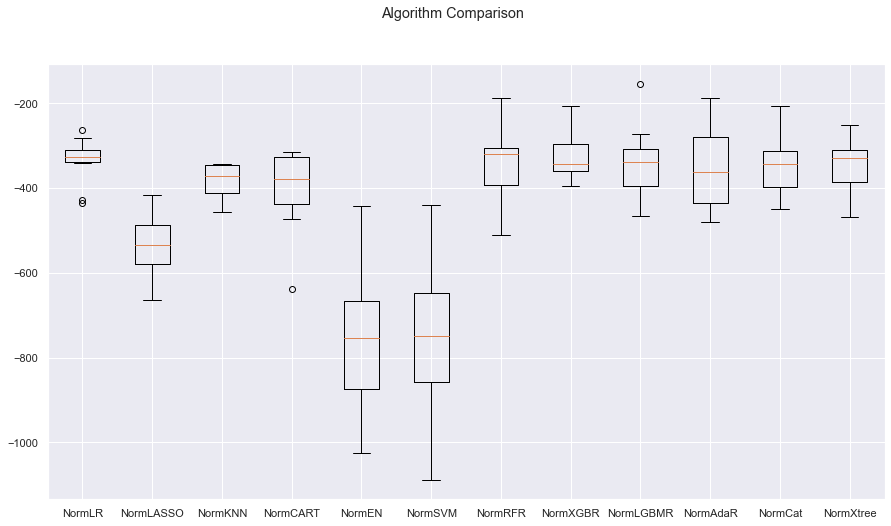

In [31]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results_norm)
ax.set_xticklabels(names_norm)
plt.show()

In [32]:
# 평균값 비교 
compare_algo_mean = pd.DataFrame([ i.mean() for i in results],columns=['Base'],index=names)
compare_algo_mean['Stand'] = [ i.mean() for i in results_scaled]
compare_algo_mean['Norm'] = [ i.mean() for i in results_norm]

<Figure size 1152x576 with 0 Axes>

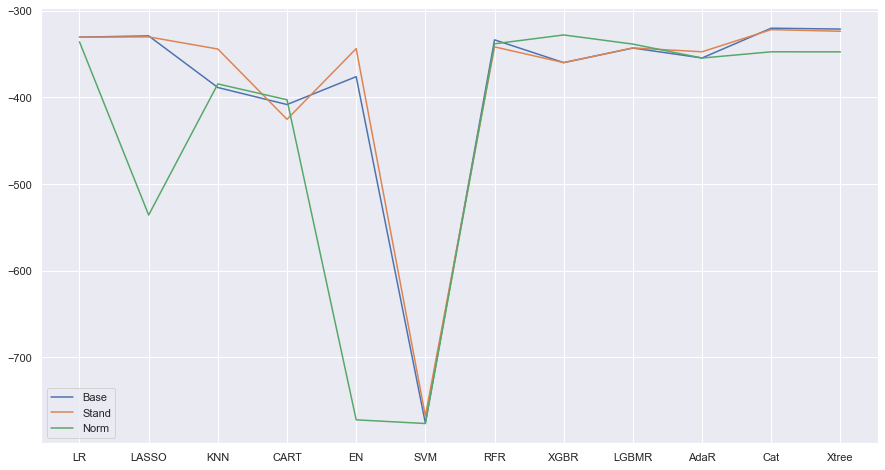

In [33]:
plt.figure(figsize=(16,8))
ax =compare_algo_mean.plot()
plt.xticks(range(len(compare_algo_mean.index)), compare_algo_mean.index)
plt.show()

In [34]:
# 중간값 비교
compare_algo_mid = pd.DataFrame([ np.median(i) for i in results],columns=['Base'],index=names)
compare_algo_mid['Stand'] = [ np.median(i)for i in results_scaled]
compare_algo_mid['Norm'] = [ np.median(i) for i in results_norm]

<Figure size 1152x576 with 0 Axes>

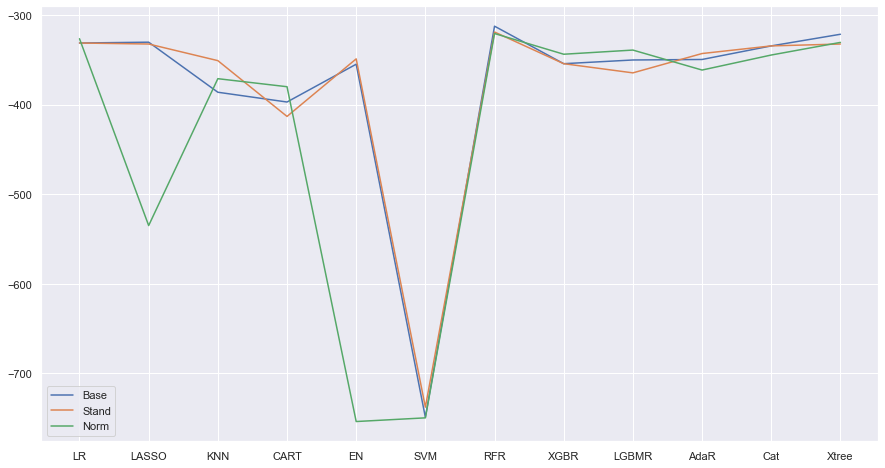

In [35]:
plt.figure(figsize=(16,8))
ax =compare_algo_mid.plot()
plt.xticks(range(len(compare_algo_mid.index)), compare_algo_mid.index)
plt.show()

# 랜덤포레스트 Parameter 튜닝

In [36]:
scaler = preprocessing.StandardScaler().fit(X_all)
scaled_X = scaler.transform(X_all)

params = { 'n_estimators' : [10, 50,100],
           'max_depth' : [6, 12,18,24],
           'min_samples_leaf' : [1, 6, 12, 18],
           'min_samples_split' : [2, 8, 16, 20]
            }
model = RandomForestRegressor()
kfold = KFold(n_splits= num_folds,random_state = seed,shuffle = True)
grid = GridSearchCV(estimator= model, param_grid = params,scoring= 'neg_root_mean_squared_error',cv=kfold )
grid_result = grid.fit(X_all, y_all)

In [37]:
print("Best : %f using %s "%(grid_result.best_score_,grid_result.best_params_))

Best : -321.314356 using {'max_depth': 12, 'min_samples_leaf': 12, 'min_samples_split': 8, 'n_estimators': 10} 


In [38]:
params = { 'n_estimators' : [10, 50,100],
           'max_depth' : [6,12,18,24],
           'min_samples_leaf' : [1, 6, 12, 18],
           'min_samples_split' : [2,4,8, 16]
            }
model =ExtraTreesRegressor()
kfold = KFold(n_splits= num_folds,random_state = seed,shuffle = True)
grid = GridSearchCV(estimator= model, param_grid = params,scoring= 'neg_root_mean_squared_error',cv=kfold )
grid_result = grid.fit(X_all,y_all)

In [39]:
print("Best : %f using %s "%(grid_result.best_score_,grid_result.best_params_))

Best : -308.753596 using {'max_depth': 18, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 50} 


In [40]:
from sklearn.metrics import mean_squared_error
import math 

In [41]:
errors = []
pred_valid=[]
pred_test = []
scaler = preprocessing.StandardScaler().fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_valid = scaler.transform(X_valid)
scaled_X_test = scaler.transform(test)

In [42]:
lasso = Lasso()
lasso.fit(X_train,y_train)
lasso_valid = lasso.predict(X_valid)
rmse = math.sqrt(mean_squared_error(y_valid, lasso_valid))
errors.append(('Lasso',rmse))
pred_valid.append(('Lasso',lasso_valid))
lasso_test = lasso.predict(test)
pred_test.append(('Lasso',lasso_test))

In [43]:
LR =LinearRegression()
LR.fit(scaled_X_train,y_train)
lr_valid = LR.predict(scaled_X_valid)
rmse = math.sqrt(mean_squared_error(y_valid, lr_valid))
errors.append(('LR',rmse))
pred_valid.append(('LR',lr_valid))
lr_test = LR.predict(scaled_X_test)
pred_test.append(('LR',lr_test))

In [44]:
RF =RandomForestRegressor(max_depth= 6, min_samples_leaf= 6, min_samples_split= 20, n_estimators= 10)
RF.fit(scaled_X_train,y_train)
rf_valid = RF.predict(scaled_X_valid)
rmse = math.sqrt(mean_squared_error(y_valid, rf_valid))
errors.append(('RF',rmse))
pred_valid.append(('RF',rf_valid))
rf_test = RF.predict(scaled_X_test)
pred_test.append(('RF',rf_test))

In [45]:
ET =ExtraTreesRegressor(max_depth=24, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 50)
ET.fit(X_train,y_train)
et_valid = ET.predict(X_valid)
rmse = math.sqrt(mean_squared_error(y_valid, et_valid))
errors.append(('ET',rmse))
pred_valid.append(('ET',et_valid))
et_test = ET.predict(test)
pred_test.append(('ET',et_test))

In [46]:
CAT = CatBoostRegressor(iterations=10000,random_state=7 
           ,eval_metric="RMSE")
CAT.fit(X_train,y_train, eval_set=[(X_valid,y_valid)],early_stopping_rounds=300
        ,verbose=1000 )
cat_valid = CAT.predict(X_valid)
rmse = math.sqrt(mean_squared_error(y_valid, cat_valid))
errors.append(('CAT',rmse))
pred_valid.append(('CAT',cat_valid))
cat_test = CAT.predict(test)
pred_test.append(('CAT',cat_test))

Learning rate set to 0.00858
0:	learn: 773.3188232	test: 779.5634198	best: 779.5634198 (0)	total: 1.14ms	remaining: 11.4s
Stopped by overfitting detector  (300 iterations wait)

bestTest = 321.8123096
bestIteration = 534

Shrink model to first 535 iterations.


In [47]:
for name, error in errors:
  print("{} : {}".format(name,error))

Lasso : 290.0820435953512
LR : 294.25479332076395
RF : 335.3346504960225
ET : 313.2058463277993
CAT : 321.8123095522918


In [48]:
val= np.zeros(X_valid.shape[0])
for name, pred in pred_valid:
  val+= (0.2* pred)
math.sqrt(mean_squared_error(y_valid, val))

288.5206985495163

In [49]:
val= np.zeros(X_valid.shape[0])
for name, pred in pred_valid:
  if name == 'Lasso' or name=='LR' or name == 'ET' or name=='CAT':
    val+= (0.25* pred)
math.sqrt(mean_squared_error(y_valid, val))

284.4719182504742

In [53]:
val= np.zeros(X_valid.shape[0])
for name, pred in pred_valid:
  if name == 'Lasso' or name=='LR' or name == 'ET':
    val+= (0.33 * pred)
math.sqrt(mean_squared_error(y_valid, val))

283.5400744489689

In [55]:
test_val= np.zeros(test.shape[0])
for name, pred in pred_test:
  if name == 'Lasso' or name=='LR' or name == 'ET':
    test_val+= (0.33* pred)

In [56]:
ss['Body Mass (g)'] = test_val
ss

,id,Body Mass (g)
0,0,4168.63
1,1,5578.62
2,2,3567.59
3,3,3354.08
4,4,3386.62
...,...,...
223,223,3933.84
224,224,4736.05
225,225,4633.51
226,226,3905.89


In [57]:
ss.to_csv('C:/Users/wnrrh/desktop/dacon/penguin/4model_ss.csv',index=False)